# **Business Problem**


Predict the Price of laptop on the basis of

Context A dataset for 1300 laptop models.

Content, Company Name, Product Name, Laptop Type, Screen Inches, Screen Resolution, CPU Model, RAM Characteristics, Memory, GPU Characteristics, Operating System, Laptop's Weight, Laptop's Price

# **Data Preprocessing**

In [3]:
import warnings
import os

# Suppress UserWarnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Set the maximum CPU count manually
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Change "4" to your desired number of cores


In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd


In [5]:
# Load the dataset
df = pd.read_csv('laptop_data.csv')

In [6]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
# View basic info and check for duplicates or missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
  # Removing unwanted columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
# Handling columns with missing or invalid data
df['Ram']= df['Ram'].str.replace('GB', '')  # Remove 'GB' and convert to integer
df['Weight'] = df['Weight'].str.replace('kg', '')   # Remove 'kg' and convert to float


In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
# Convert 'Ram' column to int32 and 'Weight' column to float32 for appropriate data type handling
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# **Exploratory Data Analysis**

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Count'>

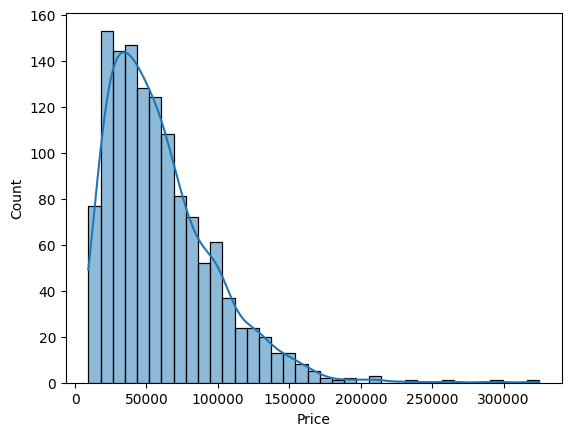

In [16]:
## Plotting a distribution of the 'Price' column to visualize its frequency distribution
sns.histplot(df['Price'], kde=True)

<Axes: xlabel='Company'>

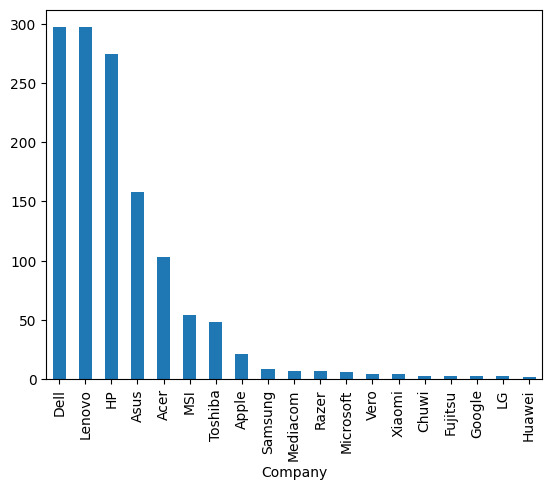

In [17]:
df['Company'].value_counts().plot(kind='bar')

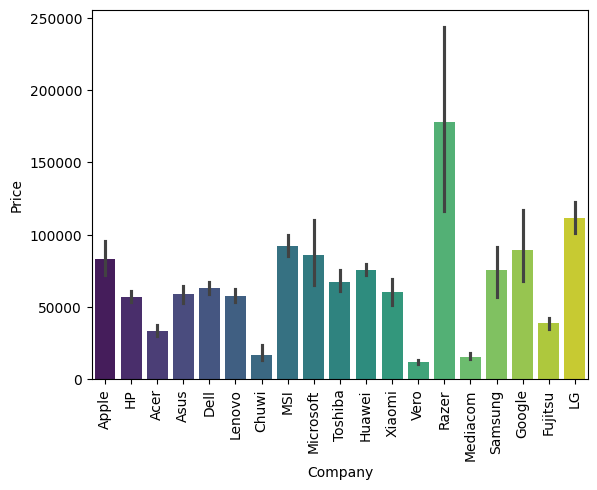

In [18]:
## Creating a bar plot showing the relationship between 'Company' and 'Price', using a 'viridis' color palette and vertical x-axis labels
sns.barplot(x=df['Company'], y=df['Price'], hue=df['Company'], palette="viridis", legend=False)  # Use a palette for colorful bars
plt.xticks(rotation='vertical')
plt.show()



<Axes: xlabel='TypeName'>

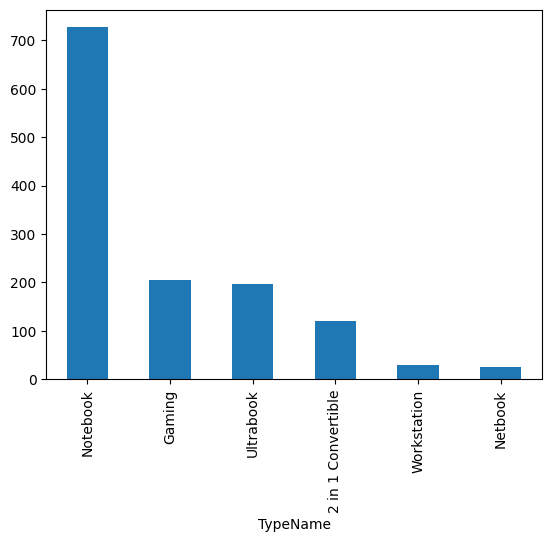

In [19]:
## Plotting a bar chart showing the frequency distribution of different values in the 'TypeName' column
df['TypeName'].value_counts().plot(kind='bar')

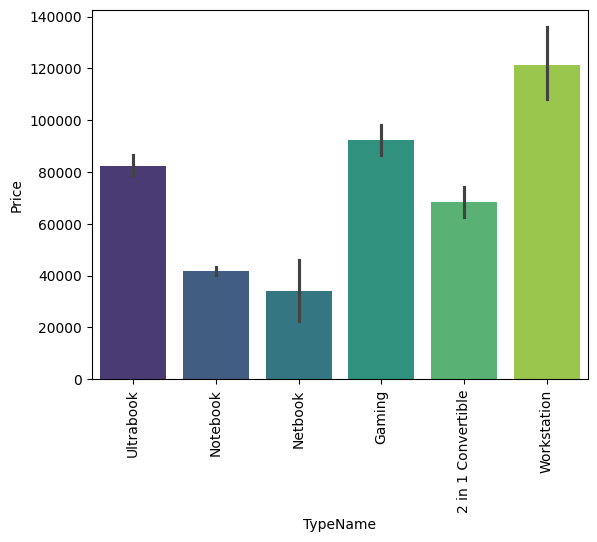

In [20]:
# Creating a bar plot to show the relationship between 'TypeName' and 'Price', with a 'viridis' color palette
sns.barplot(x=df['TypeName'], y=df['Price'], hue=df['TypeName'], palette="viridis", legend=False)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Count'>

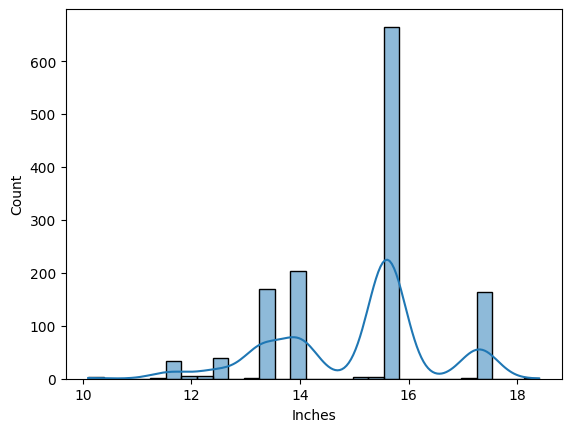

In [21]:
sns.histplot(df['Inches'], kde=True)

<Axes: xlabel='Inches', ylabel='Price'>

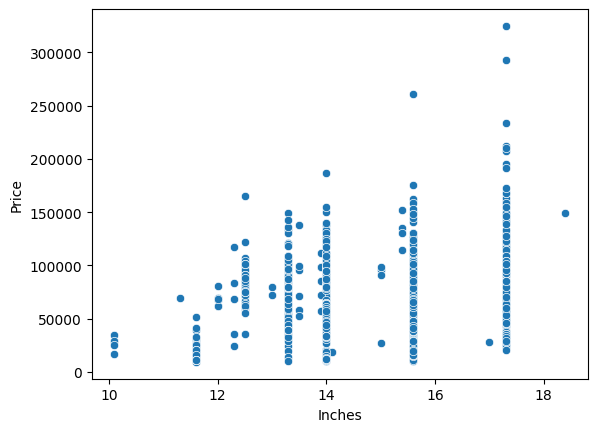

In [22]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [23]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [24]:
#Creating a new column 'TouchScreen' where 1 indicates a touchscreen and 0 indicates no touchscreen, based on the presence of 'Touchscreen' in the 'ScreenResolution' column
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [26]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
456,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,109010.88,0
717,Lenovo,Notebook,15.6,1366x768,AMD A6-Series 7310 2GHz,4,500GB HDD,AMD Radeon R4,Windows 10,2.19,15877.44,0
37,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,52161.12,0
751,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.84,101232.00,0
1288,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


<Axes: xlabel='TouchScreen'>

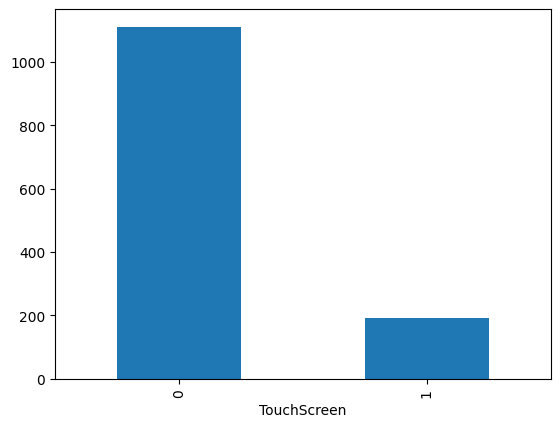

In [27]:
#Plotting a bar chart showing the count of touchscreen vs non-touchscreen devices based on the 'TouchScreen' column
df['TouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

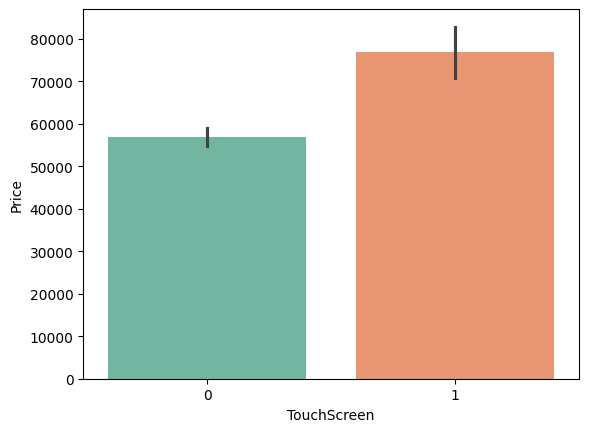

In [28]:
# Creating a bar plot to show the average price of touchscreen vs non-touchscreen devices using 'TouchScreen' and 'Price' columns, with 'Set2' color palette
sns.barplot(x=df['TouchScreen'], y=df['Price'], hue=df['TouchScreen'], palette='Set2', legend=False)

In [29]:
# Creating a new column 'IPS' by checking if the 'ScreenResolution' contains 'IPS'; assign 1 if True, otherwise 0
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS'>

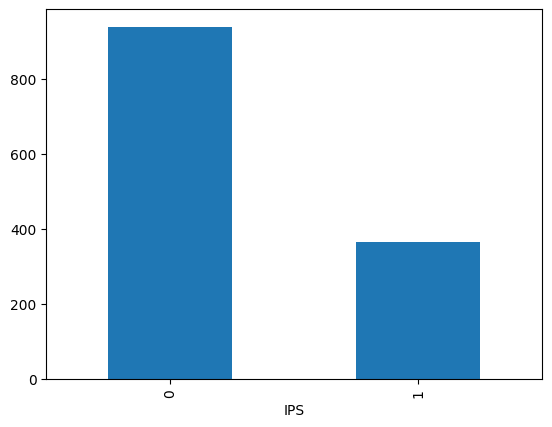

In [31]:
# Plotting a bar chart to visualize the distribution of the 'IPS' column values (0 and 1)
df['IPS'].value_counts().plot(kind='bar')

In [32]:
#Splitting the 'ScreenResolution' column into two new columns based on the 'x' separator,
# and assigning the result to a new variable 'new' with two columns (width and height)

new = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [33]:
# Assigning the first column (width) of the 'new' DataFrame to 'X_res' and
#the second column (height) to 'Y_res' in the original DataFrame

df['X_res'] = new[0]
df['Y_res'] = new[1]

In [34]:
#checking again
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [35]:
# Cleaning the 'X_res' column by removing commas, extracting numeric values, and
# keeping only the first value in each list using regex

df['X_res']  = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [36]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [37]:
#Convering the 'X_res' and 'Y_res' columns to integer type for further analysis
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [39]:
# Calculating the pixel per inch (PPI) for each laptop based on screen resolution and screen size
df['ppi']= (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [40]:
# Ensuring 'Price' is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Droping non-numeric columns and compute correlation
correlation = df.select_dtypes(include=['number']).corr()
print(correlation['Price'])


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64


In [41]:
# Droping the 'ScreenResolution' column as it's no longer needed after extracting relevant features
df.drop(columns=['ScreenResolution'], inplace=True)

In [42]:
# Droping the 'Inches', 'X_res', and 'Y_res' columns as they are no longer needed after calculating PPI
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [43]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [44]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [45]:
#Extracting the first three words from the 'Cpu' column to create a simplified 'Cpu Name' column
df['Cpu Name']= df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [46]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [47]:
# Classifying processor names into Intel (i7, i5, i3), other Intel, or AMD categories

def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'


In [48]:
# Applying the fetch_processor function to create a new column 'CPU Brand' based on the 'Cpu Name'
df['CPU Brand'] = df['Cpu Name'].apply(fetch_processor)

In [49]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU Brand'>

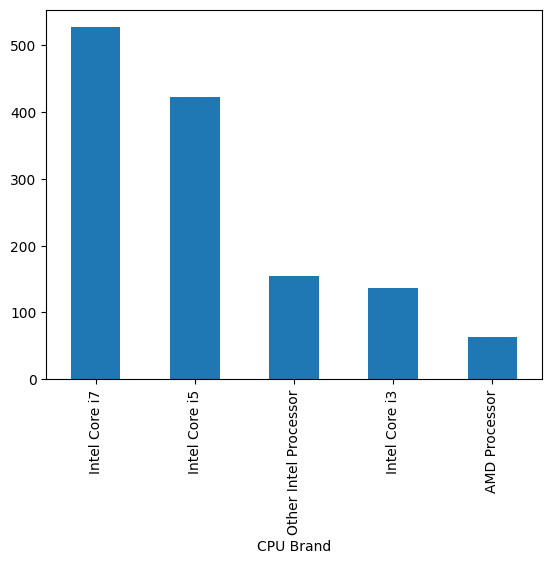

In [50]:
# Plots a bar chart showing the count of each unique 'CPU Brand'

df['CPU Brand'].value_counts().plot(kind='bar')

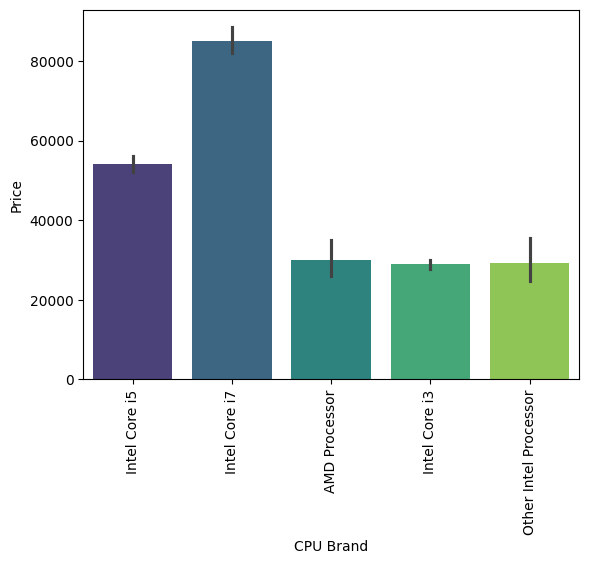

In [51]:
# Creating a bar plot to visualize the relationship between 'CPU Brand' and 'Price' using the 'viridis' color palette

sns.barplot(x=df['CPU Brand'], y=df['Price'], hue=df['CPU Brand'], palette='viridis', legend=False)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
# Droping the 'Cpu' and 'Cpu Name' columns from the DataFrame

df.drop(columns=['Cpu','Cpu Name'], inplace=True)

In [53]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

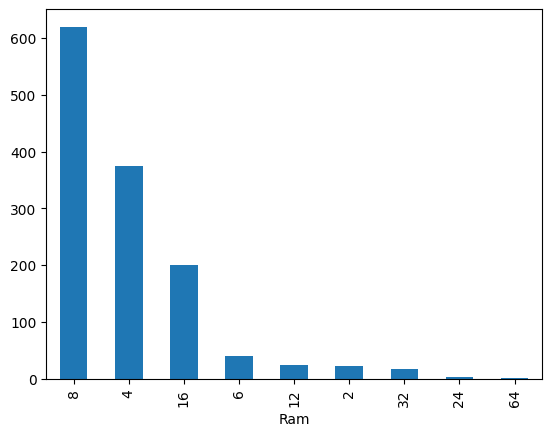

In [54]:
# Ploting a bar chart showing the count of each unique value in the 'Ram' column

df['Ram'].value_counts().plot(kind='bar')

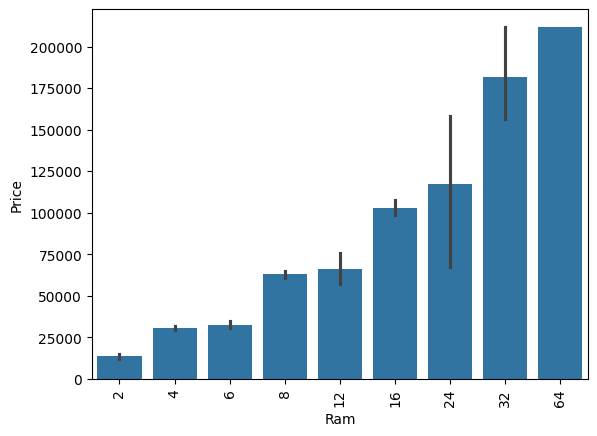

In [55]:
# Creating a bar plot to visualize the relationship between 'Ram' and 'Price', with 'Ram' on the x-axis and 'Price' on the y-axis

sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Memory'].value_counts()

In [57]:
# Preprocess 'Memory' column
df["Memory"] = df["Memory"].astype(str).replace(r'\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract 'first' and 'second' storage components
df["first"] = new[0].str.strip()
df["second"] = new[1]

# Extract storage type from 'first'
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract numeric values from 'first'
df["first"] = df["first"].str.extract(r'(\d+)').fillna("0").astype(int)

# Extract storage type from 'second' before cleaning
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if isinstance(x, str) and "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if isinstance(x, str) and "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if isinstance(x, str) and "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if isinstance(x, str) and "Flash Storage" in x else 0)

# Extract numeric values from 'second'
df["second"] = df["second"].str.extract(r'(\d+)').fillna("0").astype(int)

# Compute total sizes for each storage type
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [58]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [59]:
# Dropping the 'Memory' column from the DataFrame

df.drop(columns=['Memory'], inplace=True)

In [60]:
# Ensure 'Price' is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop non-numeric columns and compute correlation
correlation = df.select_dtypes(include=['number']).corr()
print(correlation['Price'])

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


In [61]:
# Droping the 'Hybrid' and 'Flash_Storage' columns from the DataFrame

df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [62]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [63]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [64]:
# Extracting the first word from the 'Gpu' column and assigns it as the 'GPU Brand'

df['GPU Brand']= df['Gpu'].apply(lambda x:x.split()[0])

In [65]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


<Axes: xlabel='GPU Brand'>

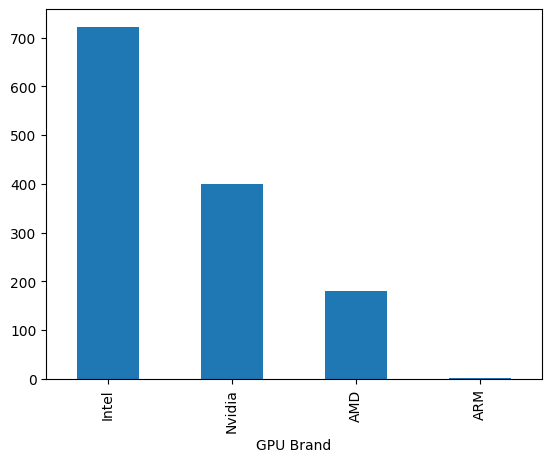

In [66]:
# Plotting the frequency distribution of unique GPU brands as a bar chart

df['GPU Brand'].value_counts().plot(kind='bar')

In [67]:
#Filtering out rows where the 'GPU Brand' is 'ARM' from the DataFrame

df = df[df['GPU Brand'] != 'ARM']

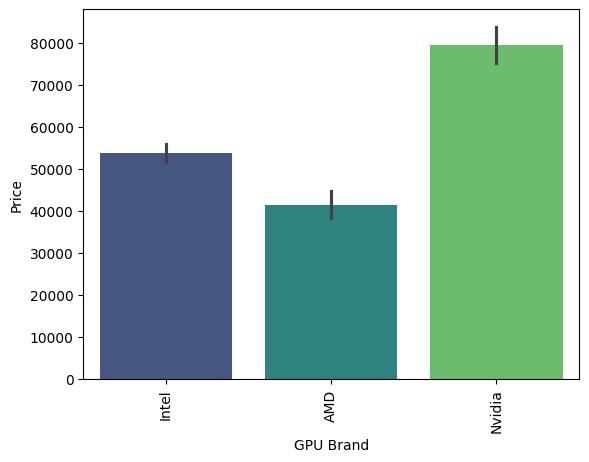

In [68]:
sns.barplot(x=df['GPU Brand'], y=df['Price'], hue=df['GPU Brand'], palette='viridis', legend=False)
plt.xticks(rotation='vertical')
plt.show()

In [69]:
df.drop(columns=['Gpu'], inplace=True)

In [70]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [71]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

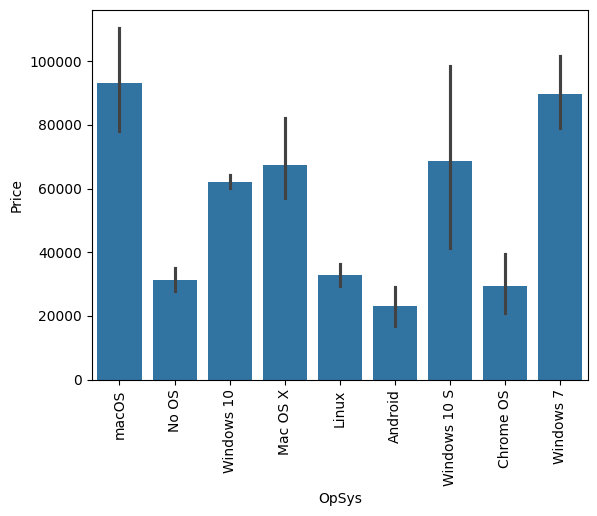

In [72]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [73]:
# Defining a function 'cat_os' to categorize the OS into 'Windows', 'Mac', or 'Others/No OS/Linux' based on the input value

def cat_os(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'

In [74]:
df['os'] = df['OpSys'].apply(cat_os)

In [75]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [76]:
df.drop(columns=['OpSys'], inplace=True)

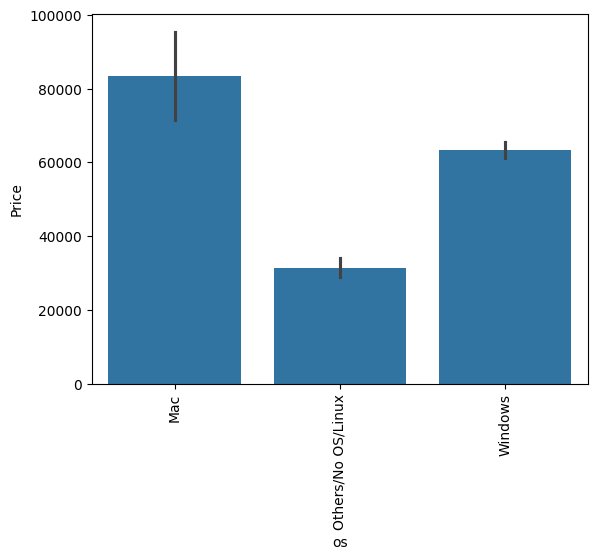

In [77]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Count'>

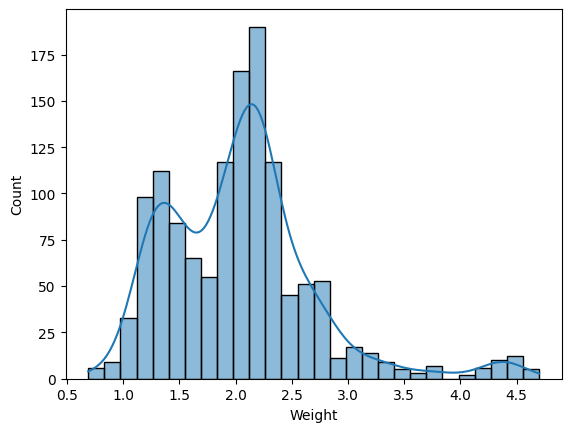

In [78]:
# Ploting the distribution of the 'Weight' column in the DataFrame using a histogram with a KDE (Kernel Density Estimate) curve

sns.histplot(df['Weight'], kde=True)

<Axes: xlabel='Weight', ylabel='Price'>

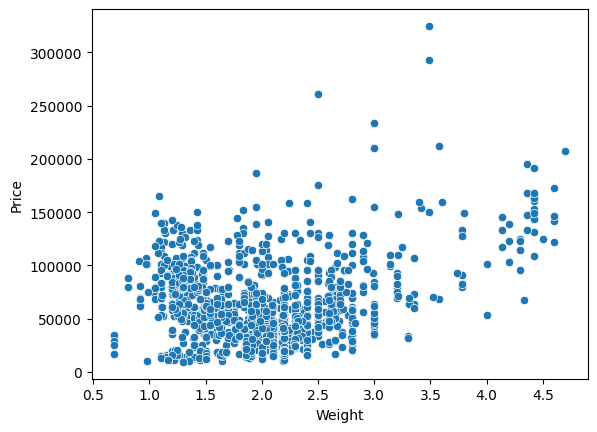

In [79]:
# Creating a scatter plot showing the relationship between 'Weight' and 'Price'

sns.scatterplot(x=df['Weight'], y=df['Price'])

<Axes: >

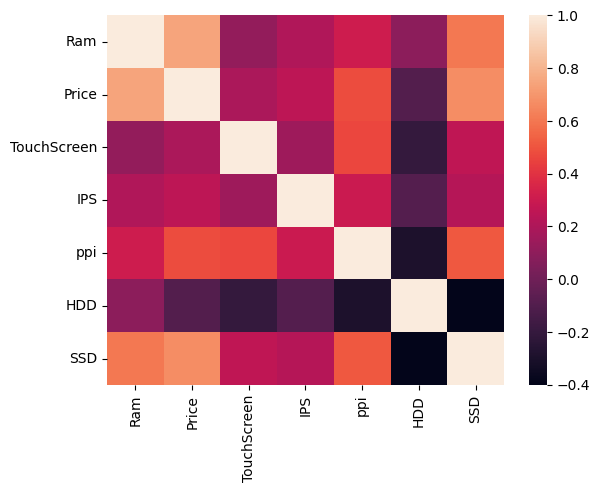

In [80]:
# Selecting columns with numeric data types (int and float) and generates a heatmap of their correlation matrix

numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])
sns.heatmap(numeric_df.corr())


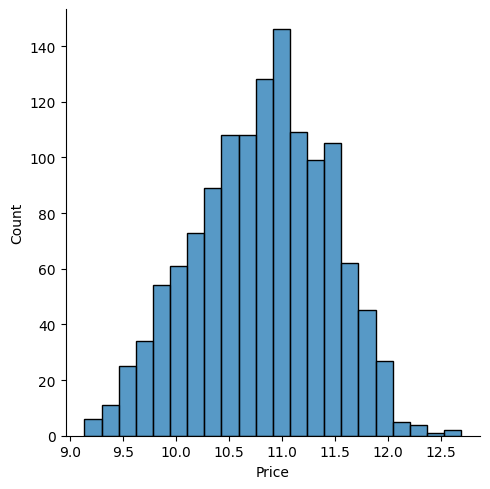

In [81]:
# Ploting a histogram of the log-transformed 'Price' column to reduce skewness and visualize the distribution

sns.displot(np.log(df['Price']))

In [82]:
# Splitting the dataset into features (X) and target variable (y). The 'Price' column is dropped from X,
# and the natural logarithm of 'Price' is taken for y to reduce skewness.

X = df.drop(columns='Price')
y = np.log(df['Price'])

# **Model Training & Evaluation**

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=2)

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [85]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor


In [86]:
#Linear Regression

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8155475391412774
MAE: 0.20534714304537216


In [87]:
#Ridge Regression

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8162776919477533
MAE: 0.2079145207967985


In [88]:
#Lasso Regression

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8089282098547792
MAE: 0.21079972619092582


In [89]:
#KNN

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8477547066727787
MAE: 0.18663913292629147


In [90]:
#Decision Trees

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.81804941777242
MAE: 0.19305972741723731


In [91]:
#Support Vector

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.846311851737886
MAE: 0.18661670394532107


In [92]:
#Random Forest

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8791013005905923
MAE: 0.16058363364675332


In [93]:
#ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = ExtraTreesRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15,
    bootstrap=True
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8797739499915062
MAE: 0.16369704771667556


In [94]:
#Ada Boost


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.7834735403336293
MAE: 0.2354903745548398


In [95]:
#Gradient-Boosting

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8749962478098722
MAE: 0.15969956410916794


In [96]:
#Voting-Regressor
from sklearn.ensemble import VotingRegressor, StackingRegressor


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8, 9, 10, 11])
], remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt',gbdt), ('xgb',xgb), ('et',et)], weights=[5,1,1,1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8825150042739519
MAE: 0.1603747896415242


In [97]:
#Stacking Regressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Correcting the OneHotEncoder parameter
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.87909566509595
MAE: 0.16555166382471956


In [98]:
#exporting the files

import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))